<a href="https://colab.research.google.com/github/scarfboy/wetsuite-dev/blob/main/examples/dataset_kamervragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip --quiet install https://github.com/scarfboy/wetsuite-dev/archive/refs/heads/main.zip

In [ ]:
import wetsuite.datasets
kv = wetsuite.datasets.load('kamervragen')

In [ ]:
print( kv.description )


    Questions from members of the parliament (at the moment only tweede kamer) to the government.

    Source: The KOOP SRU repositories,  specifically the ah-tk documents (aanhangsels, tweede kamer) within the officielepublicaties set.
    Restricted to documents that contain answers (ignoring documents that are only the questions, or only a note that they will be answered later)

    The structure of .data looks something like:
       {'ah-tk-20102011-2857': {
            'identifier': 'ah-tk-20102011-2857',
            'urls':   [ 'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/metadata/metadata.xml',
                        'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/xml/ah-tk-20102011-2857.xml',
                        ... 
                      ],
            'issued':       '2011-06-17',
            'available':    '2011-06-23',
            'vergaderjaar': '2010-2011',
            

# What do questions look like?

In [ ]:
import textwrap, random

for kv_id, kv_details in random.sample( kv.data.items(), 2):  # pick two random documents
    print('\n=== %s ==='%kv_id)
    vraagdata = kv_details['vraagdata']
    for number in vraagdata:
          vraag    = vraagdata[number].get('vraag')    # note that these will be [plaintext, xmlfragment],  the [0] below picks up just the first
          antwoord = vraagdata[number].get('antwoord')
          if vraag and antwoord:  # one way to ignore lone vraag/antwoord  due to the mentioned grouping (the get() will fetch one to be None)
              print(  'Q%-5s  %s'%( number, '\n'.join(  textwrap.wrap(vraag[0],    subsequent_indent='        ')  ) )  ) 
              print(  'A%-5s  %s'%( number, '\n'.join(  textwrap.wrap(antwoord[0], subsequent_indent='        ')  ) )  )
              print()



=== ah-tk-20102011-1105 ===
Q1      Wat is uw oordeel over de TV-uitzending over het feit dat er grote
        verschillen bestaan in behandelingen tussen artsen, tot wel
        een factor vier?
A1      In de uitzending van Nieuwsuur van 11 december jl. is uitgebreid
        ingegaan op het fenomeen «praktijkvariatie». Dat er variatie
        bestaat tussen de wijze waarop artsen hun patiënten behandelen
        is op zich geen nieuw gegeven. Vergelijkbare verschillen
        worden ook in het buitenland gesignaleerd. Mijn
        ambtsvoorganger heeft er in de vorige kabinetsperiode ook
        meerdere malen aandacht voor gevraagd.  Variatie is niet per
        definitie «slecht». Verschillen in behandelpatronen kunnen
        bijvoorbeeld worden veroorzaakt doordat bepaalde
        zorginstellingen of artsen zich hebben gespecialiseerd in de
        behandeling van bepaalde aandoeningen en daarom ook zwaardere
        patiënten te behandelen krijgen. In die gevallen is het niet
  

# How many cases are there of grouped answers leading to mismatches in numbering?

In [ ]:
mismatched_qa, matched_qa = 0,0

for id, details in list(kv.data.items()):
    vraagdata = details['vraagdata']

    vraag_numbers = set()
    antwoord_numbers = set()

    for qa_number in vraagdata:
        if 'vraag' in vraagdata[qa_number]:
            vraag_numbers.add( qa_number )
        if 'antwoord' in vraagdata[qa_number]:
            antwoord_numbers.add( qa_number )

        diff = vraag_numbers.symmetric_difference( antwoord_numbers )
        if len(diff) == 0:
            matched_qa    += 1
        else:
            mismatched_qa += 1
            if 0:  # showing all cases in the dataset would be very spammy
                print('\n=== %s ==='%id)
                print("Vragen:     %s"%sorted(vraag_numbers))
                print("Antwoorden: %s"%sorted(antwoord_numbers))
                print("Difference: %s"%sorted(diff))
                print( details['urls'][-1] )  # mention the document we used, so we can look at it

print( f"Matched: {matched_qa}     Not matched: {mismatched_qa}" )

Matched: 219302     Not matched: 12259


# What does the metadata look like?

In [ ]:
import pandas   # pandas is a nice way to inspect and alter tabular data
df = pandas.DataFrame.from_dict( kv.data, orient='index' ) 
df['available_parsed'] = pandas.to_datetime( df['available'] )  # add a new colum that is the date string interpreted as a python datetime (used below)
df

,urls,indiener,ontvanger,vergaderjaar,available,issued,type,category,identifier,vraagdata,available_parsed
ah-tk-20152016-84,[https://repository.overheid.nl/frbr/officiele...,[T.E. Siderius],[S. Dekker],2015-2016,2015-09-22,2015-09-22,"[officiële publicatie, Antwoord, Aanhangsel va...",Onderwijs en wetenschap | Organisatie en beleid,ah-tk-20152016-84,{'1': {'vraag': ['Hoe beoordeelt u de alarmere...,2015-09-22
ah-tk-20112012-1688,[https://repository.overheid.nl/frbr/officiele...,[F. Bashir],[M.H. Schultz van Haegen-Maas Geesteranus],2011-2012,2012-03-01,2012-02-29,"[officiële publicatie, Antwoord, Aanhangsel va...",Verkeer | Organisatie en beleid,ah-tk-20112012-1688,{'1': {'vraag': ['Klopt het dat het nuttigen v...,2012-03-01
ah-tk-20102011-2757,[https://repository.overheid.nl/frbr/officiele...,[M.L. Thieme],[M.J.M. Verhagen],2010-2011,2011-06-16,2011-06-07,"[officiële publicatie, Antwoord, Aanhangsel va...",Ruimte en infrastructuur | Netwerken,ah-tk-20102011-2757,{'1': {'vraag': ['Kent u het bericht «Roep om ...,2011-06-16
ah-tk-20132014-1349,[https://repository.overheid.nl/frbr/officiele...,"[C.J.E. Kooiman, J.M.A.M. de Wit]",[F. Teeven],2013-2014,2014-03-11,2014-03-07,"[officiële publicatie, Antwoord, Aanhangsel va...",Recht | Strafrecht,ah-tk-20132014-1349,{'1 5 6': {'vraag': ['Waarom zijn de regels om...,2014-03-11
ah-tk-20192020-4064,[https://repository.overheid.nl/frbr/officiele...,[R.J. (Rudmer) Heerema],[A. Slob],2019-2020,2020-09-10,2020-09-09,"[officiële publicatie, Antwoord, Aanhangsel va...",Onderwijs en wetenschap | Basisonderwijs,ah-tk-20192020-4064,{'1': {'vraag': ['Bent u bekend met het rappor...,2020-09-10
...,...,...,...,...,...,...,...,...,...,...,...
ah-tk-20102011-2535,[https://repository.overheid.nl/frbr/officiele...,"[C.J.E. Kooiman, R.M. Leijten]",[E.I. Schippers],2010-2011,2011-05-26,2011-05-17,"[officiële publicatie, Antwoord, Aanhangsel va...",Zorg en gezondheid | Organisatie en beleid,ah-tk-20102011-2535,{'1': {'vraag': ['Wat is uw reactie op het ber...,2011-05-26
ah-tk-20112012-2692,[https://repository.overheid.nl/frbr/officiele...,[C.G. van der Staaij],"[F. Teeven, J.M. van Bijsterveldt-Vliegenthart]",2011-2012,2012-06-05,2012-06-04,"[officiële publicatie, Antwoord, Aanhangsel va...",Cultuur en recreatie | Media,ah-tk-20112012-2692,{'1': {'vraag': ['Bent u bekend met de evaluat...,2012-06-05
ah-tk-20132014-2353,[https://repository.overheid.nl/frbr/officiele...,[R.J. Klever],[H.G.J. Kamp],2013-2014,2014-07-02,2014-06-25,"[officiële publicatie, Antwoord, Aanhangsel va...",Natuur en milieu | Energie,ah-tk-20132014-2353,{'1 2 3 4 5': {'vraag': ['Wat is uw reactie op...,2014-07-02
ah-tk-20202021-4081,[https://repository.overheid.nl/frbr/officiele...,[M. van Nispen],[F.B.J. Grapperhaus],2020-2021,2021-09-20,2021-09-14,"[officiële publicatie, Antwoord, Aanhangsel va...","Openbare orde en veiligheid | Politie, brandwe...",ah-tk-20202021-4081,{'1 3 4': {'vraag': ['Bent u bekend met het be...,2021-09-20


In [ ]:
df['category'].value_counts()

Zorg en gezondheid | Organisatie en beleid             2586
Openbare orde en veiligheid | Criminaliteit            1409
Internationaal | Organisatie en beleid                 1393
Openbare orde en veiligheid | Organisatie en beleid    1217
Recht | Staatsrecht                                     818
                                                       ... 
Migratie en integratie | Emigratie                       16
Recht | Bestuursrecht                                    15
Sociale zekerheid | Nabestaanden                         12
Economie | Toerisme                                      11
Werk | Levensloop                                         8
Name: category, Length: 111, dtype: int64

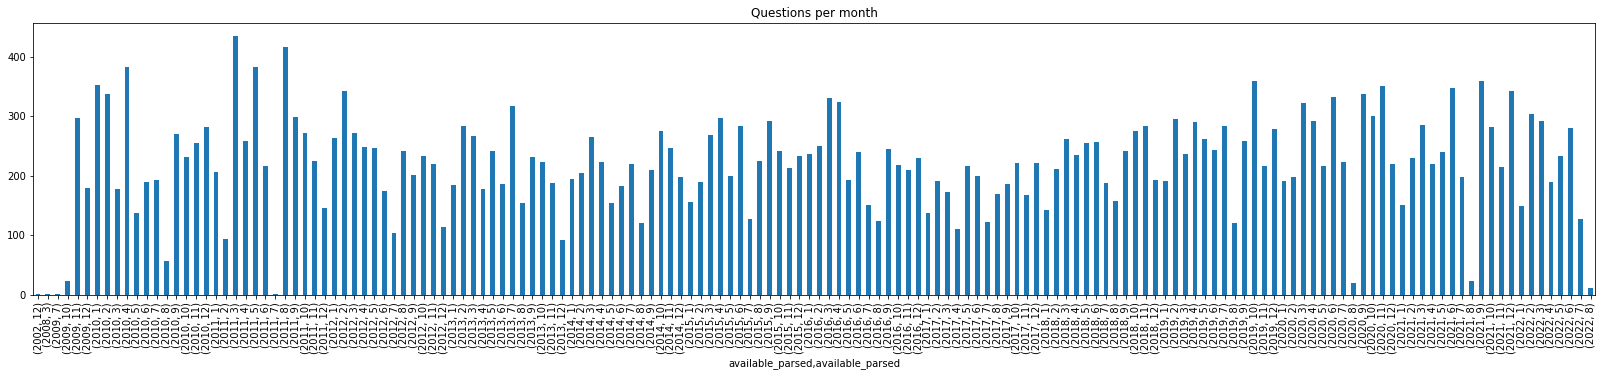

In [ ]:
# you could do a histogram over time something like:
#import matplotlib.pyplot, matplotlib.ticker
#fig, axis = matplotlib.pyplot.subplots()
#axis.hist(df['year'],  rwidth=0.8, bins=max(df['year'])-min(df['year']) )
#axis.xaxis.set_major_locator( matplotlib.ticker.MaxNLocator(integer=True) )
#axis.set_title('question sets per year')

# ...but pandas is quite succinct here.  Once you understand how it works, that is.
df['available_parsed'].groupby( [df["available_parsed"].dt.year,df["available_parsed"].dt.month] ).count().plot(kind="bar", figsize=(28,5), title='Questions per month')
